In [17]:
import cv2
import os
import glob
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import HeNormal
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.applications import MobileNetV2

In [8]:
#!pip3 install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 5.8 MB/s eta 0:00:0000:0100:01


# Reading in Data

In [2]:
folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 
                'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 
                'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 
                'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 
                'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 
                'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 
                'Romanesque architecture' ]

In [3]:
file_jpg = glob.glob(f'../CSE_404_Project/**/{folder_paths[2]}/*.jpg', recursive=True)

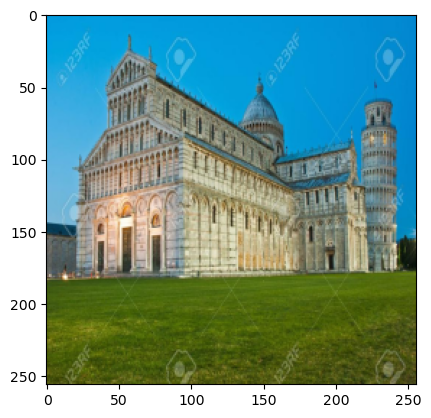

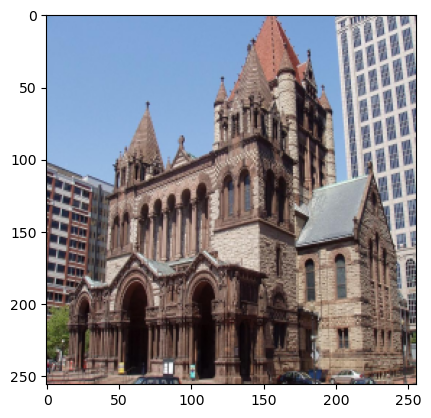

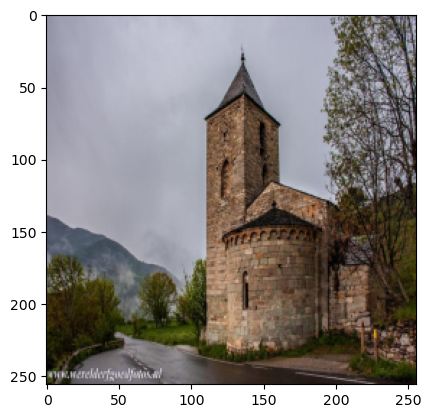

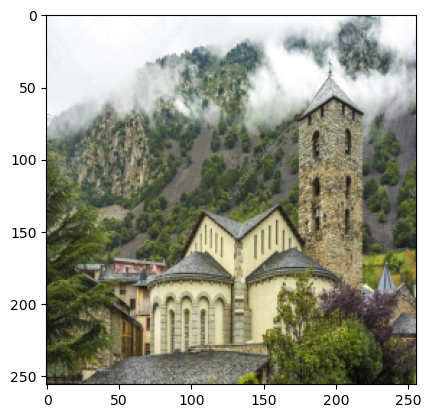

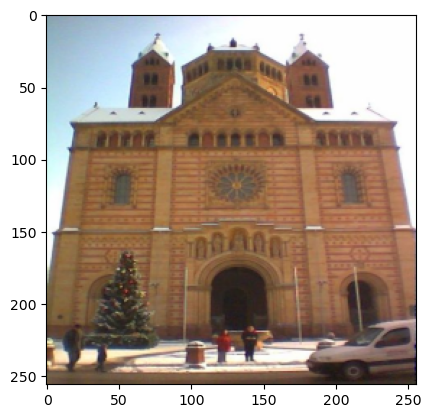

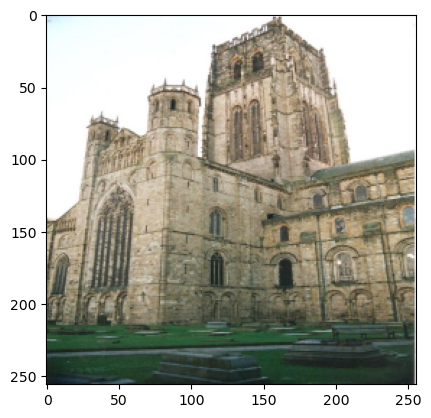

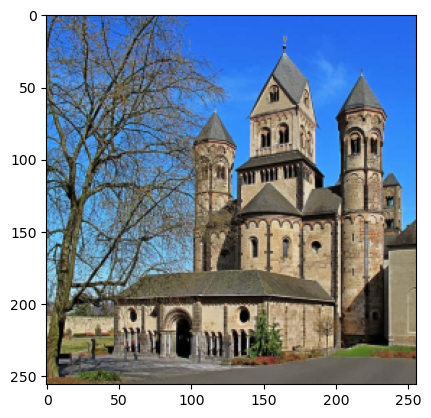

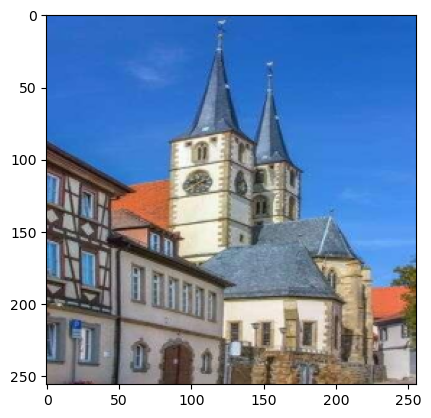

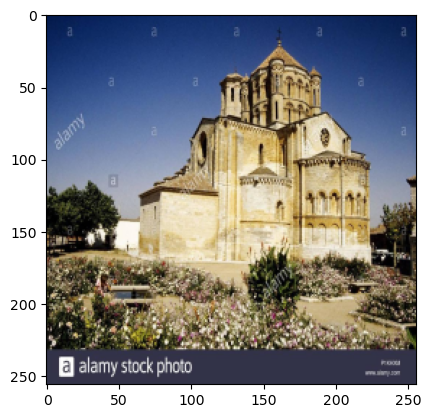

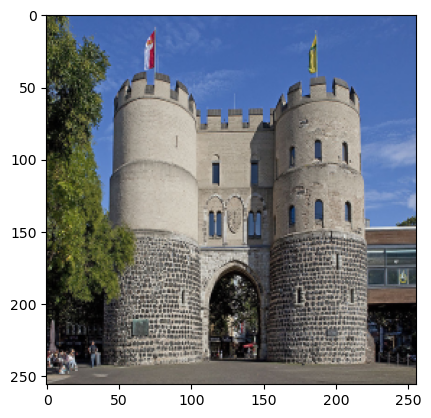

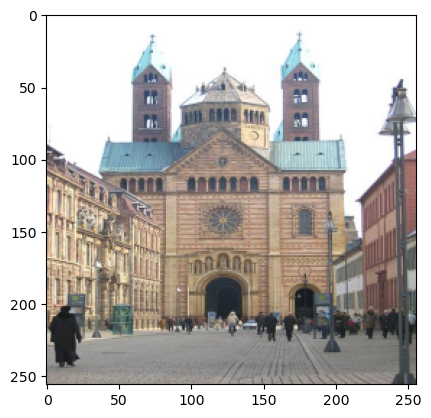

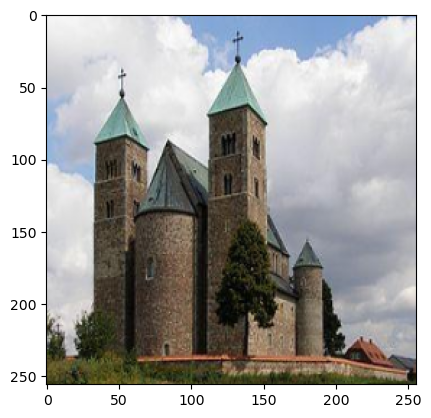

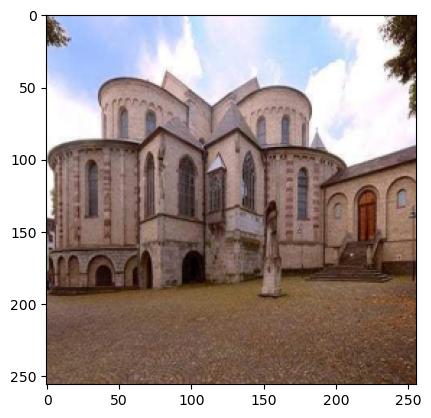

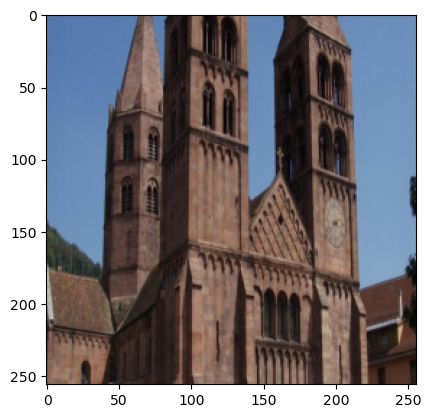

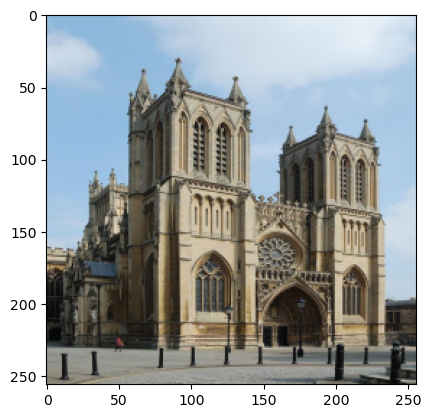

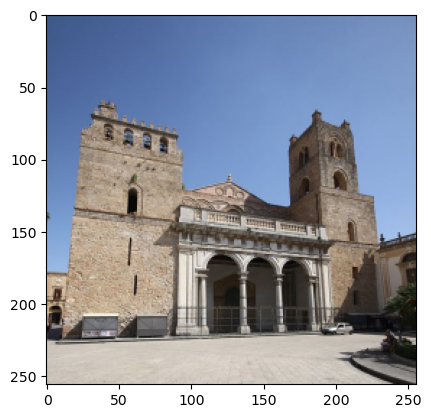

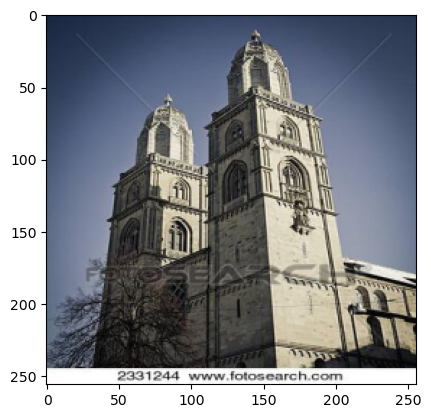

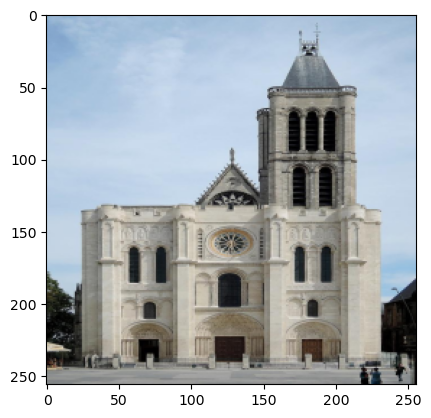

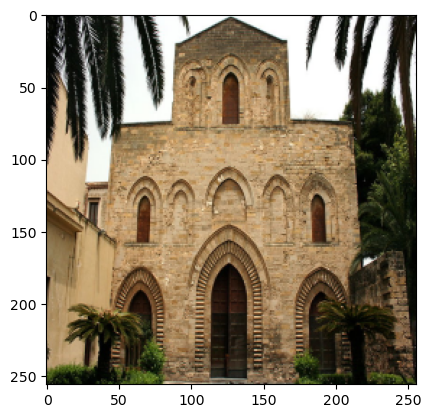

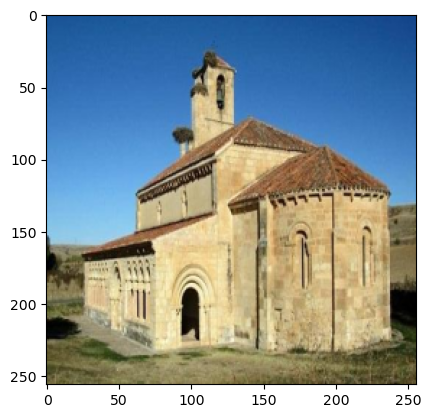

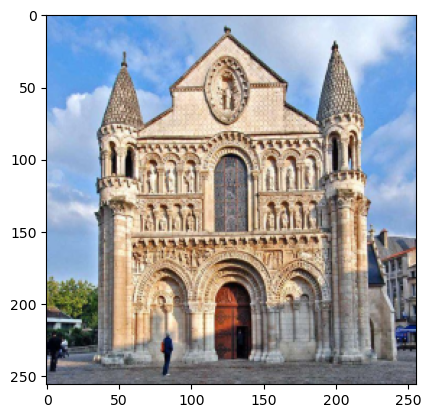

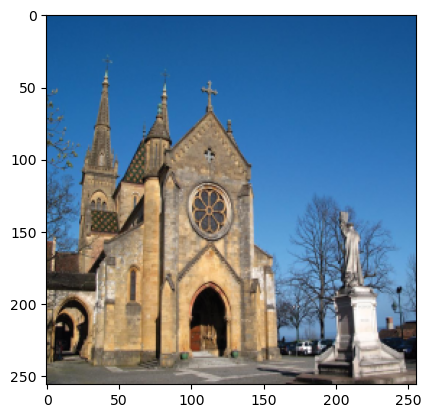

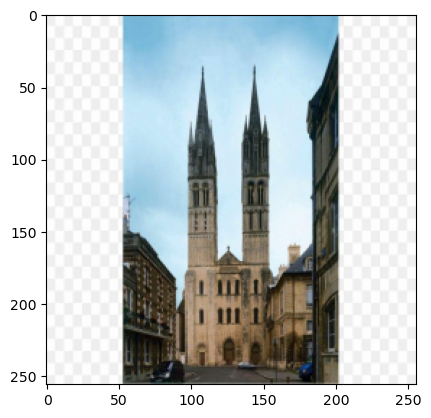

In [23]:
dim = (256,256)

for i, f in enumerate(file_jpg[:23]):
    img = cv2.imread(f)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [4]:
X = []
y = []

dim = (256,256)

for folder in folder_paths:
    file_jpg = glob.glob(f'../CSE_404_Project/**/{folder}/*.jpg', recursive=True)

    for i, f in enumerate(file_jpg):
        img = cv2.imread(f)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = img.astype('float32')
        img /= 255 
        X.append(img)
        y.append(folder)

KeyboardInterrupt: 

In [4]:
X = []
y = []

dim = (256, 256)

for folder in folder_paths:
    file_jpg = glob.glob(f'../CSE_404_Project/**/{folder}/*.jpg', recursive=True)

    for i, f in enumerate(file_jpg):
        img = cv2.imread(f)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = img.astype('float32') / 255.0
        X.append(img)
        y.append(folder)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(folder_paths))

# Splitting Training and Testing Data

In [5]:
y = [folder_paths.index(label) for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [6]:
len(X_train), len(X_test), len(X_valid)

(5167, 1615, 1292)

In [7]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

# Create and Train Neural Network

In [50]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [256, 256]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(23, activation = 'softmax')
])

In [78]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(23, activation='softmax')  # Change to the number of classes you have
])

In [97]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(23, activation='softmax')  # Change to the number of classes you have
])

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_initializer=HeNormal(), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),  # New Convolutional Layer
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, activation='relu'),  # New Dense Layer
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(64, activation='relu'),  # New Dense Layer
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(23, activation='softmax')
])

In [18]:
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(23, activation='softmax')
])

9406464/9406464 [==============================] - 1s 0us/step


In [19]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(), metrics = ['accuracy'])

In [20]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [21]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 11)

Epoch 1/11
162/162 [==============================] - 57s 336ms/step - loss: 2.1019 - accuracy: 0.3817 - val_loss: 1.5928 - val_accuracy: 0.5046
Epoch 2/11
162/162 [==============================] - 50s 307ms/step - loss: 1.4264 - accuracy: 0.5493 - val_loss: 1.3841 - val_accuracy: 0.5557
Epoch 3/11
162/162 [==============================] - 48s 298ms/step - loss: 1.2205 - accuracy: 0.6133 - val_loss: 1.3774 - val_accuracy: 0.5604
Epoch 4/11
162/162 [==============================] - 48s 299ms/step - loss: 1.0882 - accuracy: 0.6470 - val_loss: 1.3572 - val_accuracy: 0.5658
Epoch 5/11
162/162 [==============================] - 49s 300ms/step - loss: 0.9946 - accuracy: 0.6760 - val_loss: 1.3144 - val_accuracy: 0.5836
Epoch 6/11
162/162 [==============================] - 50s 306ms/step - loss: 0.8880 - accuracy: 0.7157 - val_loss: 1.3752 - val_accuracy: 0.5720
Epoch 7/11
162/162 [==============================] - 50s 307ms/step - loss: 0.8229 - accuracy: 0.7323 - val_loss: 1.3662 - val_ac

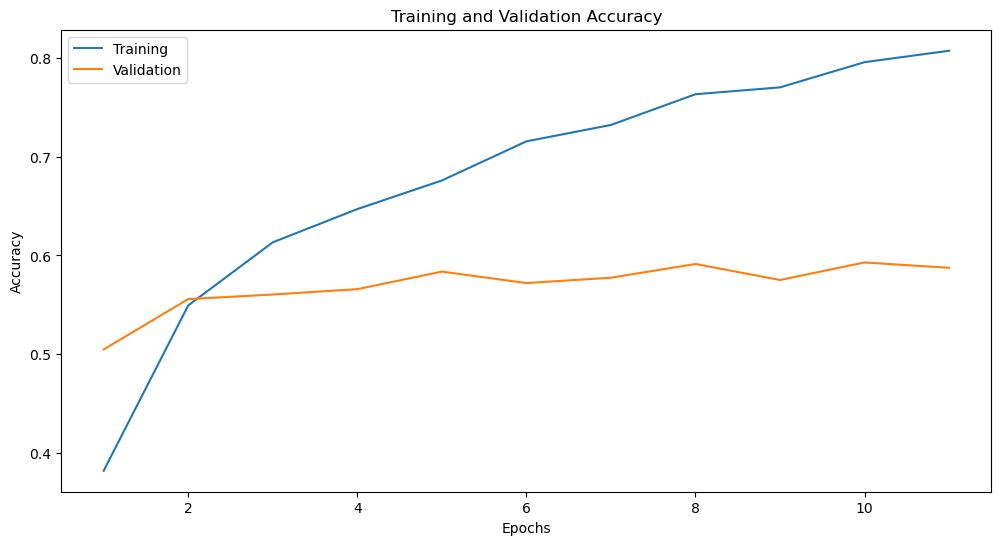

In [22]:
plt.figure(figsize = (12, 6))
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 12)
sns.lineplot(x = epoch, y = train_loss, label = 'Training')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [23]:
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

y_pred, y_test

51/51 [==============================] - 13s 238ms/step


(array([ 8, 15,  8, ..., 12, 18, 15]), array([ 2, 22,  8, ..., 20, 18,  6]))

In [24]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.6080495356037152

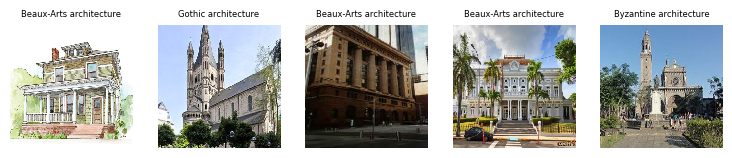

In [25]:
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_test[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(folder_paths[y_pred[index]], fontsize=6)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()